In [8]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK")

Imports OK


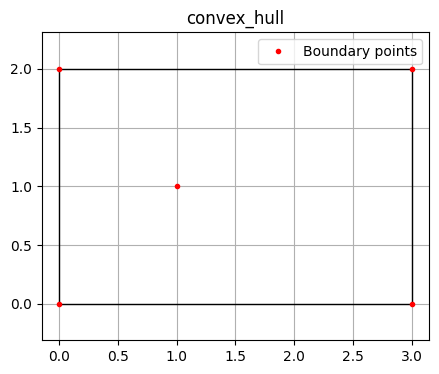

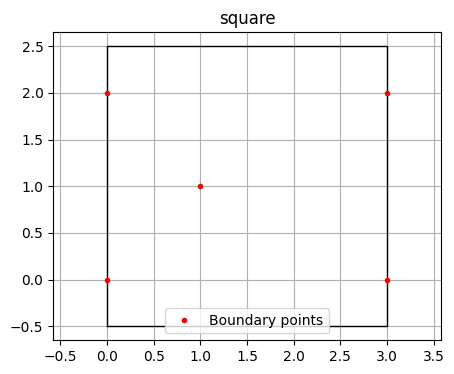

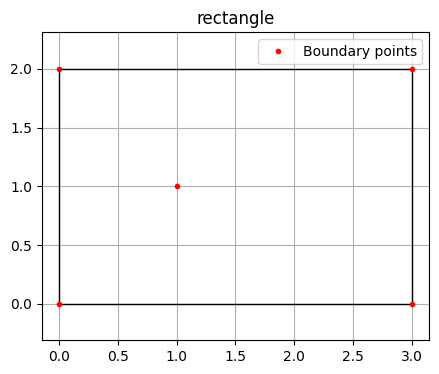

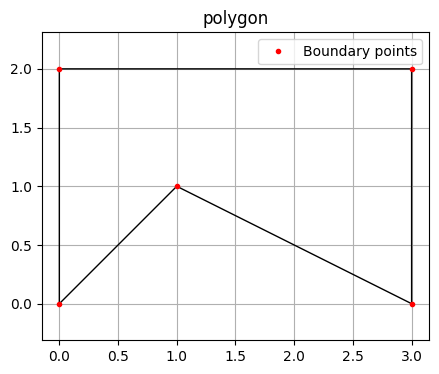

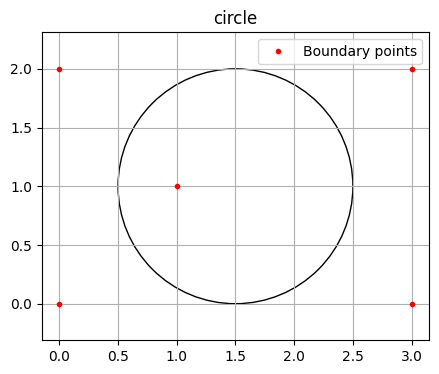

In [9]:
# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) "Sztuczne" turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest "wow" wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

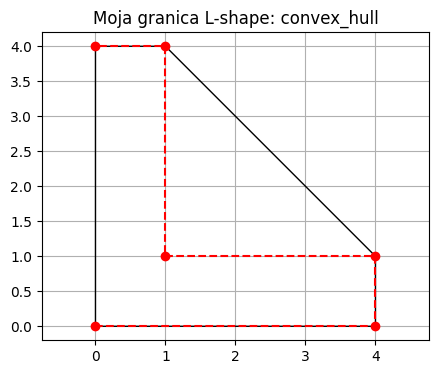

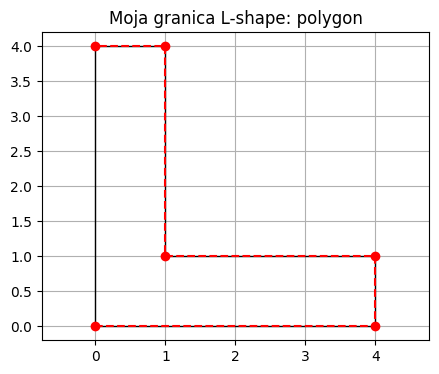

In [10]:
# Zadanie: Własna granica (Kształt litery "L")
boundary_L = np.array([
    (0, 0),
    (4, 0),
    (4, 1),
    (1, 1),
    (1, 4),
    (0, 4)
])

# Porównujemy convex_hull (wypukła otoczka) vs polygon (dokładny obrys)
for b_type in ['convex_hull', 'polygon']:
    tf_custom = TopFarmProblem(
        design_vars={'x': [0.5], 'y': [0.5]},
        cost_comp=dummy_cost,
        constraints=[XYBoundaryConstraint(boundary_L, b_type)],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(f"Moja granica L-shape: {b_type}")
    tf_custom.plot_comp.plot_constraints()
    plt.plot(boundary_L[:, 0], boundary_L[:, 1], 'o--r', label='Punkty')
    plt.axis("equal")
    plt.grid(True)

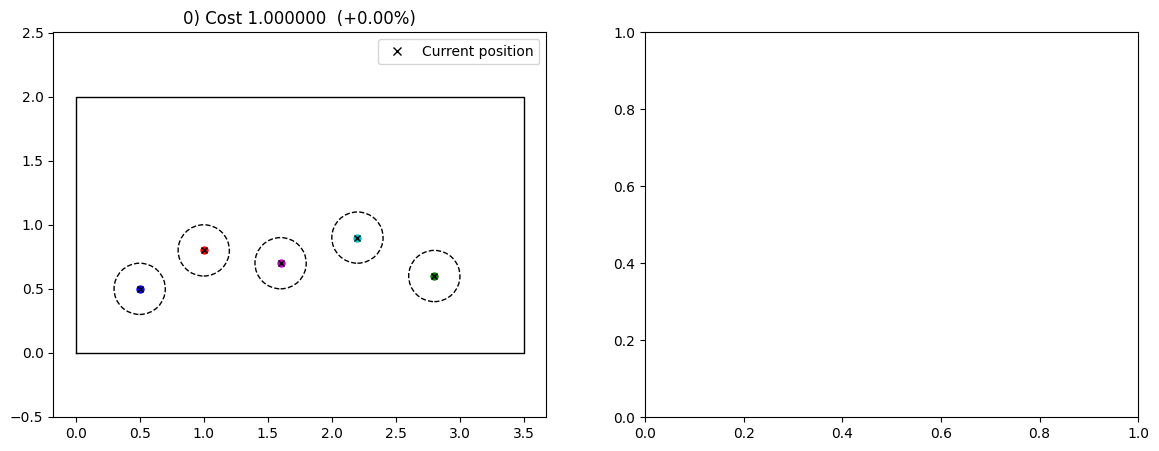

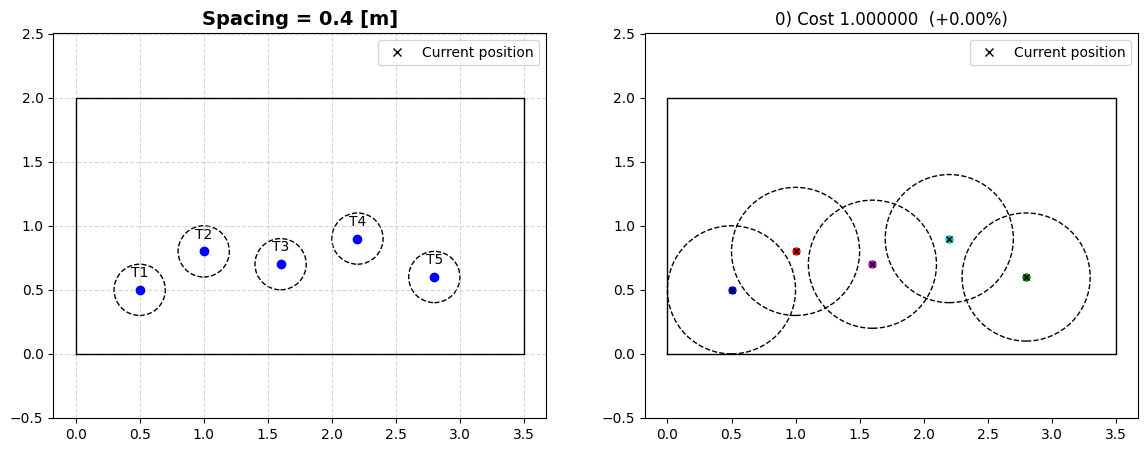

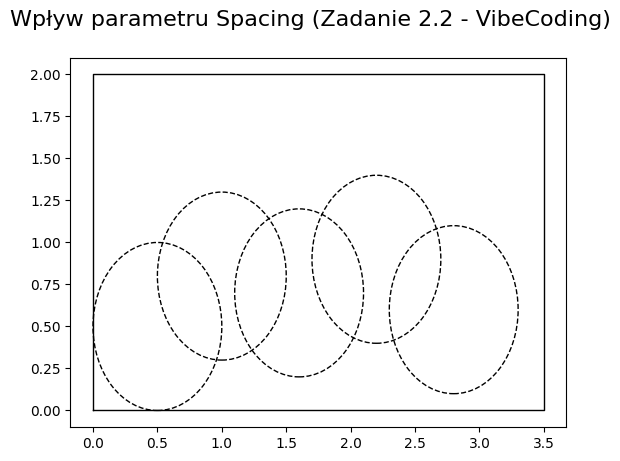

In [11]:
# --- POPRAWIONY KROK 4 i 5: SPACING + VIBECODING (Subplots) ---

# Układ 5 turbin
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])
dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

# Funkcja tworząca problem dla danego spacingu
def get_problem(spacing_val):
    return TopFarmProblem(
        design_vars={'x': x5, 'y': y5},
        cost_comp=dummy_cost5,
        constraints=[
            XYBoundaryConstraint(boundary_big, 'polygon'),
            SpacingConstraint(spacing_val)
        ],
        plot_comp=XYPlotComp()
    )

# Rysujemy 2 wykresy obok siebie
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
test_spacings = [0.4, 1.0]

for i, sp in enumerate(test_spacings):
    plt.sca(axs[i])
    tf = get_problem(sp)
    tf.setup()
    tf.evaluate() # <--- TO JEST KLUCZOWA POPRAWKA! (Liczy pozycje przed rysowaniem)
    
    # Rysowanie standardowe TopFarm
    tf.plot_comp.plot_constraints()
    
    # Dodatki wizualne (VibeCoding)
    axs[i].set_title(f"Spacing = {sp} [m]", fontsize=14, fontweight='bold')
    axs[i].scatter(x5, y5, c='blue', zorder=5, label='Turbiny')
    for k in range(len(x5)):
        axs[i].text(x5[k], y5[k]+0.1, f"T{k+1}", ha='center', fontsize=10)
    
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].axis('equal')

plt.suptitle("Wpływ parametru Spacing (Zadanie 2.2 - VibeCoding)", fontsize=16)
plt.show()